In [6]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr
import subprocess
import os


In [7]:
# Path to your original TIFF file
input_image = 'input.TIF'
original_size = os.path.getsize(input_image)
 
# Quality levels and formats
qualities = [95, 90, 85, 80, 75]
formats = ['JP2', 'WEBP', 'JPEG'] 

# Dictionary to store PSNR and SSIM values
metrics = {f: {'PSNR': [], 'SSIM': [], 'Compression': []} for f in formats}

In [8]:
def convert_image(input_path, output_path, format, q):
    if format == 'JPEG':
        os.system(f'gdal_translate -of JPEG -co QUALITY={q} {input_path} {output_path}')
    elif format == "WEBP":
        os.system(f'gdal_translate -of WEBP -co QUALITY={q} {input_path} {output_path}')
    elif format == "JP2":
        # TODO ADD METADATA HERE CONVERSION
        png_path = output_path.split(".")[0] + '.png'
        os.system(f'gdal_translate -of PNG {input_path} {png_path}')
        os.system(f'opj_compress -q {q} -i {png_path} -o {output_path}')
        os.remove(png_path)
    elif format == "JXL":
        png_path = output_path.split(".")[0] + '.png'
        os.system(f'gdal_translate -of PNG {input_path} {png_path}')
        os.system(f'./cjxl -q {q} {png_path} {output_path} --quiet')
        os.remove(png_path)

def load_and_compare(original_path, compared_path):
    with Image.open(original_path) as original, Image.open(compared_path) as compared:
        original = np.array(original)
        compared = np.array(compared)
        size = os.path.getsize(compared_path)
        psnr_value = psnr(original, compared)
        ssim_value = ssim(original, compared, data_range=255, full=True, channel_axis=2)
        compression = ((original_size - size) / original_size) * 100
        return psnr_value, ssim_value, compression

In [9]:
# Convert images
for format in formats:
    for quality in qualities:
        output_path = f'output_{quality}.{format.lower()}'
        convert_image(input_image, output_path, format, quality)

Input file size is 6336, 6540
0...10...20...30...40...50...60...70...80...90...100 - done.


[INFO] tile number 1 / 1
[INFO] Generated outfile output_95.jp2
encode time: 7982 ms 
Input file size is 6336, 6540
0...10...20...30...40...50...60...70...80...90...100 - done.


[INFO] tile number 1 / 1
[INFO] Generated outfile output_90.jp2
encode time: 8149 ms 
Input file size is 6336, 6540
0...10...20...30...40...50...60...70...80...90...100 - done.


[INFO] tile number 1 / 1
[INFO] Generated outfile output_85.jp2
encode time: 8053 ms 
Input file size is 6336, 6540
0...10...20...30...40...50...60...70...80...90...100 - done.


[INFO] tile number 1 / 1
[INFO] Generated outfile output_80.jp2
encode time: 8070 ms 
Input file size is 6336, 6540
0...10...20...30...40...50...60...70...80...90...100 - done.


[INFO] tile number 1 / 1
[INFO] Generated outfile output_75.jp2
encode time: 8088 ms 
Input file size is 6336, 6540
0...10...20...30...40...50...60...70...80...90.Input file size is 6336, 6540
0...10...20...30...40...50...60...70...80...90.Input file size is 6336, 6540
0...10...20...30...40...50...60...70...80...90.Input file size is 6336, 6540
0...10...20...30...40...50...60...70...80...90.Input file size is 6336, 6540
0...10...20...30...40...50...60...70...80...90.Input file size is 6336, 6540
0...10...20...30...40...50...60...70...80...90...100 - done.
Input file size is 6336, 6540
0...10...20...30...40...50...60...70...80...90...100 - done.
Input file size is 6336, 6540
0...10...20...30...40...50...60...70...80...90...100 - done.
Input file size is 6336, 6540
0...10...20...30...40...50...60...70...80...90...100 - done.
Input file size is 6336, 6540
0...10...20...30...40...50...60...70...80...90...100 - done.


In [10]:
# Calculate metrics
for format in formats:
    for quality in qualities:
        output_path = f'output_{quality}.{format.lower()}'
        psnr_value, ssim_value, compression = load_and_compare(input_image, output_path)
        metrics[format]['PSNR'].append(psnr_value)
        metrics[format]['SSIM'].append(ssim_value[0])
        metrics[format]['Compression'].append(compression)

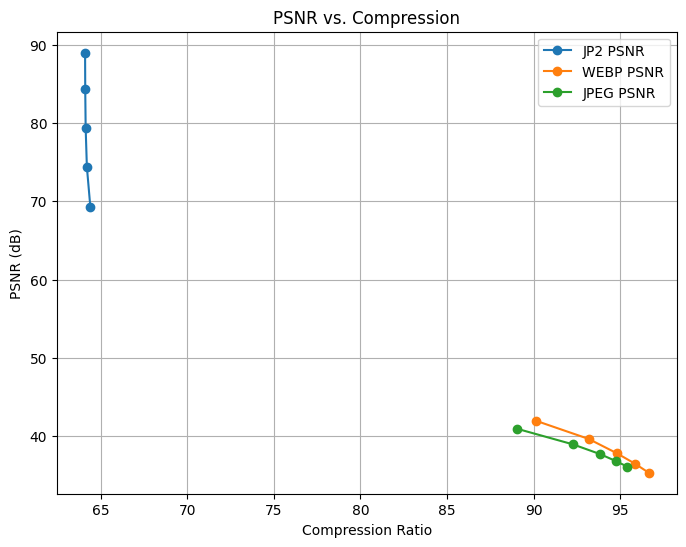

In [11]:
# PSNR vs. Compression Plot
plt.figure(figsize=(8, 6))
for format in formats:
    plt.plot(metrics[format]['Compression'], metrics[format]['PSNR'], marker='o', label=f'{format} PSNR')
plt.xlabel('Compression Ratio')
plt.ylabel('PSNR (dB)')
plt.title('PSNR vs. Compression')
plt.legend()
plt.grid(True)
plt.show()


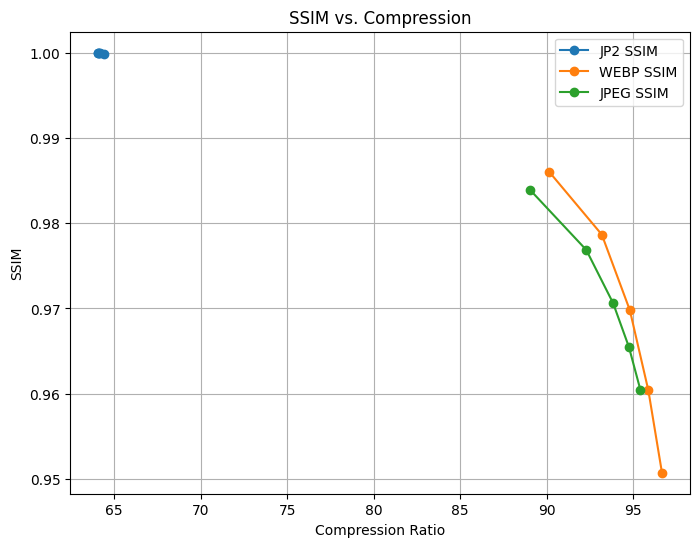

In [12]:
# PSNR vs. Compression Plot
plt.figure(figsize=(8, 6))
for format in formats:
    plt.plot(metrics[format]['Compression'], metrics[format]['SSIM'], marker='o', label=f'{format} SSIM')
plt.xlabel('Compression Ratio')
plt.ylabel('SSIM')
plt.title('SSIM vs. Compression')
plt.legend()
plt.grid(True)
plt.show()
